# Smart Home Device Usage Analysis
This notebook provides a comprehensive level analysis of the smart home device usage dataset.

## Importing required Libraries and Dataset

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA

data = pd.read_csv("data/smart_home_device_usage_data.csv")
data.head()

,UserID,DeviceType,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
0,1,Smart Speaker,15.307188,1.961607,1,4,36,1
1,2,Camera,19.973343,8.610689,1,0,29,1
2,3,Security System,18.911535,2.651777,1,0,20,1
3,4,Camera,7.011127,2.341653,0,3,15,0
4,5,Camera,22.610684,4.859069,1,3,36,1


In [46]:
data = pd.read_csv("data/smart_home_device_usage_data.csv")
data.head()

tv_count = 1000

tv_data = {
    "DeviceType": ["TV"] * tv_count,
    "UsageHoursPerDay": np.random.uniform(1, 21, tv_count),
    "EnergyConsumption": np.random.uniform(0, 10, tv_count),
    "UserPreferences": np.random.randint(0, 2, tv_count),
    "MalfunctionIncidents": np.random.randint(0, 6, tv_count),
    "DeviceAgeMonths": np.random.randint(1, 60, tv_count),
    "SmartHomeEfficiency": np.random.randint(0, 2, tv_count),
}

tv_df = pd.DataFrame(tv_data)
data = pd.concat([data, tv_df], ignore_index=True)
data = data.drop(columns=["UserID"])
data.to_csv("data/tv_add.csv", index=False)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA

data = pd.read_csv("data/tv_add.csv")
data.head()

,DeviceType,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
0,Smart Speaker,15.307188,1.961607,1,4,36,1
1,Camera,19.973343,8.610689,1,0,29,1
2,Security System,18.911535,2.651777,1,0,20,1
3,Camera,7.011127,2.341653,0,3,15,0
4,Camera,22.610684,4.859069,1,3,36,1


## Data Overview


In [8]:
data.describe()

,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
count,6403.000000,6403.000000,6403.000000,6403.000000,6403.000000,6403.000000
mean,12.464153,5.104086,0.511479,2.069499,30.292051,0.396845
std,6.631449,2.844425,0.499907,1.422038,16.979801,0.489282
min,0.501241,0.101562,0.000000,0.000000,1.000000,0.000000
25%,6.846370,2.629594,0.000000,1.000000,15.000000,0.000000
50%,12.368159,5.046735,1.000000,2.000000,30.000000,0.000000
75%,18.114368,7.631966,1.000000,3.000000,45.000000,1.000000
max,23.998381,9.998071,1.000000,4.000000,59.000000,1.000000


In [9]:
data.isnull().sum()

DeviceType              0
UsageHoursPerDay        0
EnergyConsumption       0
UserPreferences         0
MalfunctionIncidents    0
DeviceAgeMonths         0
SmartHomeEfficiency     0
dtype: int64

In [10]:
device_counts = data["DeviceType"].value_counts()
print(device_counts)

DeviceType
Smart Speaker      1108
Camera             1101
Lights             1087
Security System    1068
Thermostat         1039
TV                 1000
Name: count, dtype: int64


## Data Visualization


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_

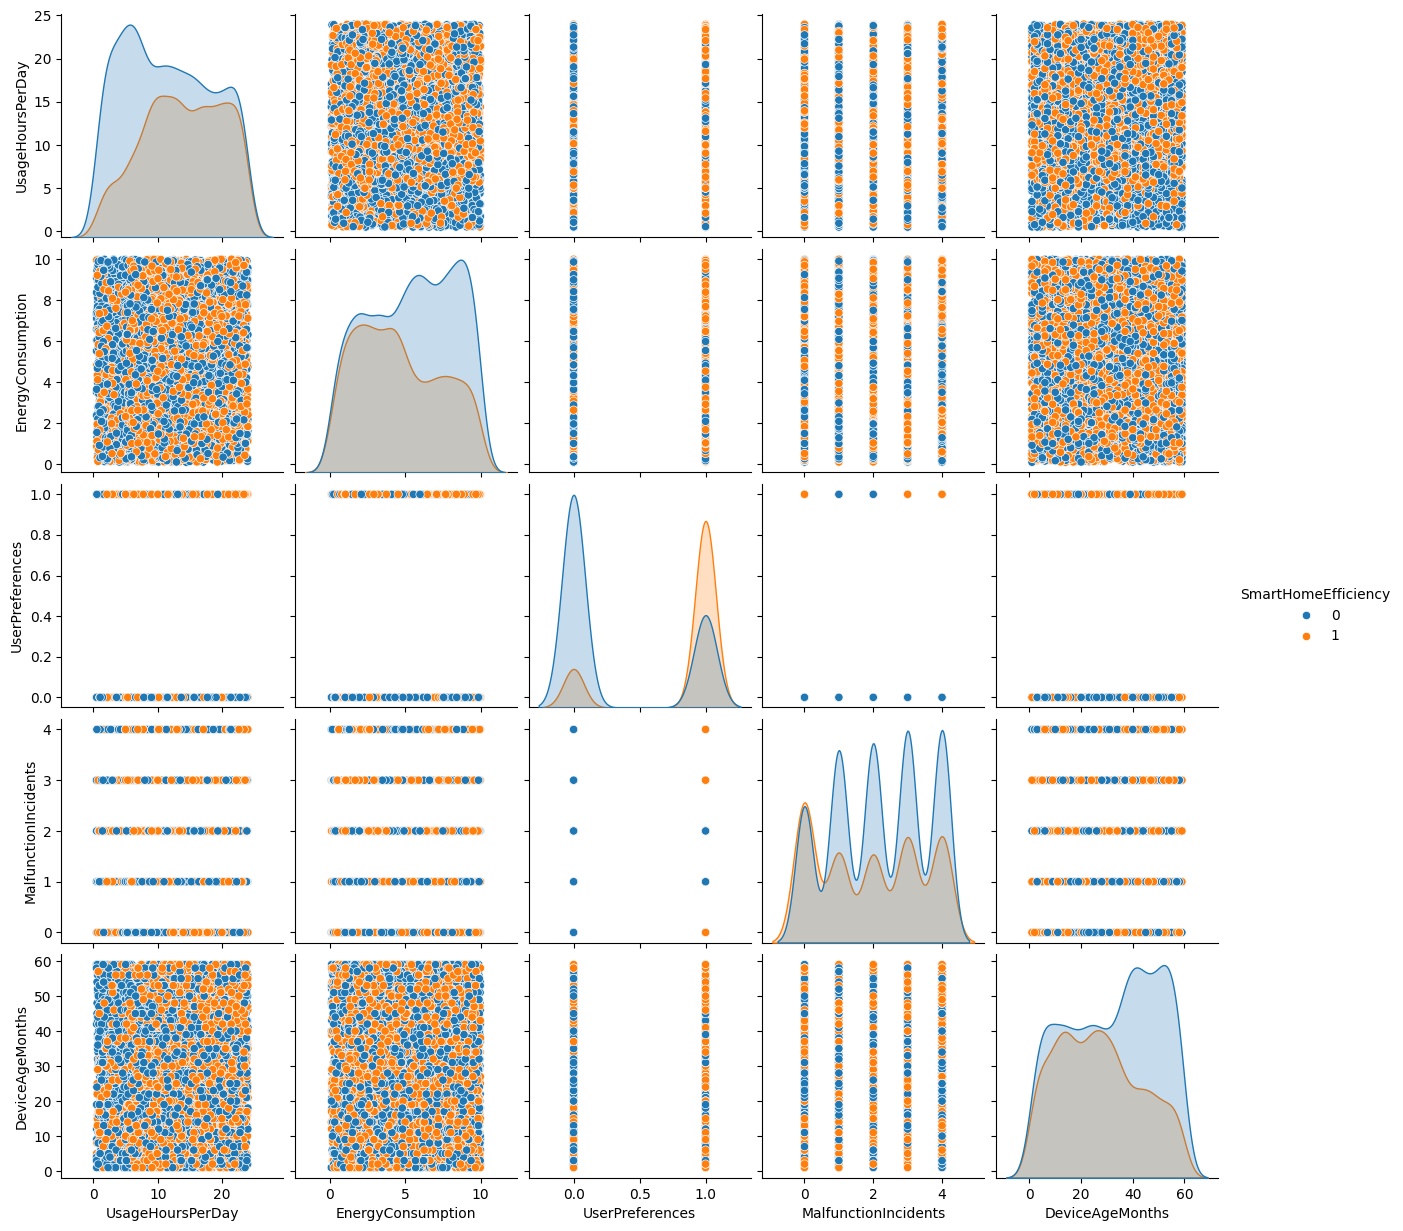

In [11]:
sns.pairplot(data, hue="SmartHomeEfficiency")
plt.show()

## Data Preprocessing


In [12]:
X = data.drop("SmartHomeEfficiency", axis=1)
y = data["SmartHomeEfficiency"]

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Principal Component Analysis (PCA)


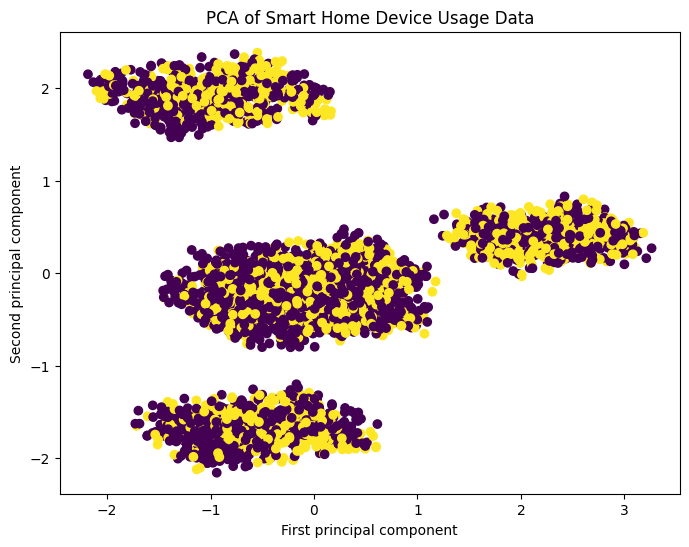

In [17]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap="viridis")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.title("PCA of Smart Home Device Usage Data")
plt.show()

## Model Building


In [23]:
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print("\n")
print("Classification Report")
print(classification_report(y_test, y_pred))
print("\n")
print("Accuracy Score")
print(accuracy_score(y_test, y_pred))

Confusion Matrix
[[1059  102]
 [ 109  651]]


Classification Report
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1161
           1       0.86      0.86      0.86       760

    accuracy                           0.89      1921
   macro avg       0.89      0.88      0.88      1921
weighted avg       0.89      0.89      0.89      1921



Accuracy Score
0.8901613742842269


## Feature Importance


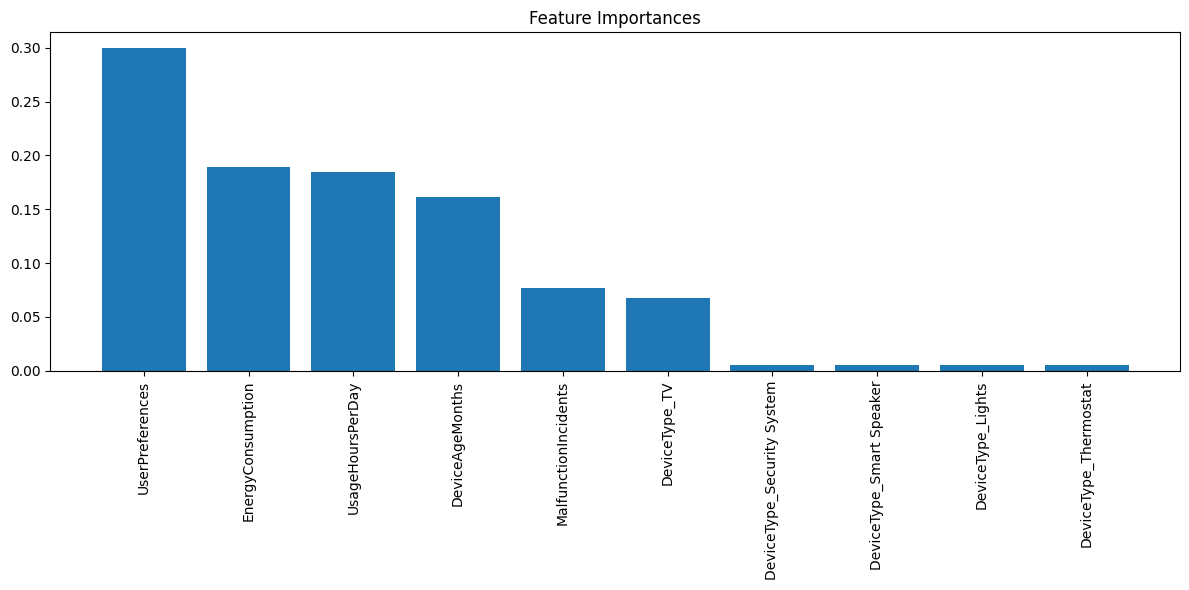

In [24]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()

## Model Optimization


In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

grid_search = GridSearchCV(
    estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2
)
grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 3 folds for each of 108 candidates, totalling 324 fits


{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

### Best estimator performance

In [29]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Confusion Matrix (Optimized Model)")
print(confusion_matrix(y_test, y_pred_best))
print("\n")
print("Classification Report (Optimized Model)")
print(classification_report(y_test, y_pred_best))
print("\n")
print("Accuracy Score (Optimized Model)")
print(accuracy_score(y_test, y_pred_best))

Confusion Matrix (Optimized Model)
[[1059  102]
 [ 112  648]]


Classification Report (Optimized Model)
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1161
           1       0.86      0.85      0.86       760

    accuracy                           0.89      1921
   macro avg       0.88      0.88      0.88      1921
weighted avg       0.89      0.89      0.89      1921



Accuracy Score (Optimized Model)
0.8885996876626757


## Model Comparison


In [30]:
baseline_accuracy = accuracy_score(y_test, y_pred)
optimized_accuracy = accuracy_score(y_test, y_pred_best)

print(f"Baseline Model Accuracy: {baseline_accuracy:.2f}")
print(f"Optimized Model Accuracy: {optimized_accuracy:.2f}")

Baseline Model Accuracy: 0.89
Optimized Model Accuracy: 0.89


## Pairplot with newly created features

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_

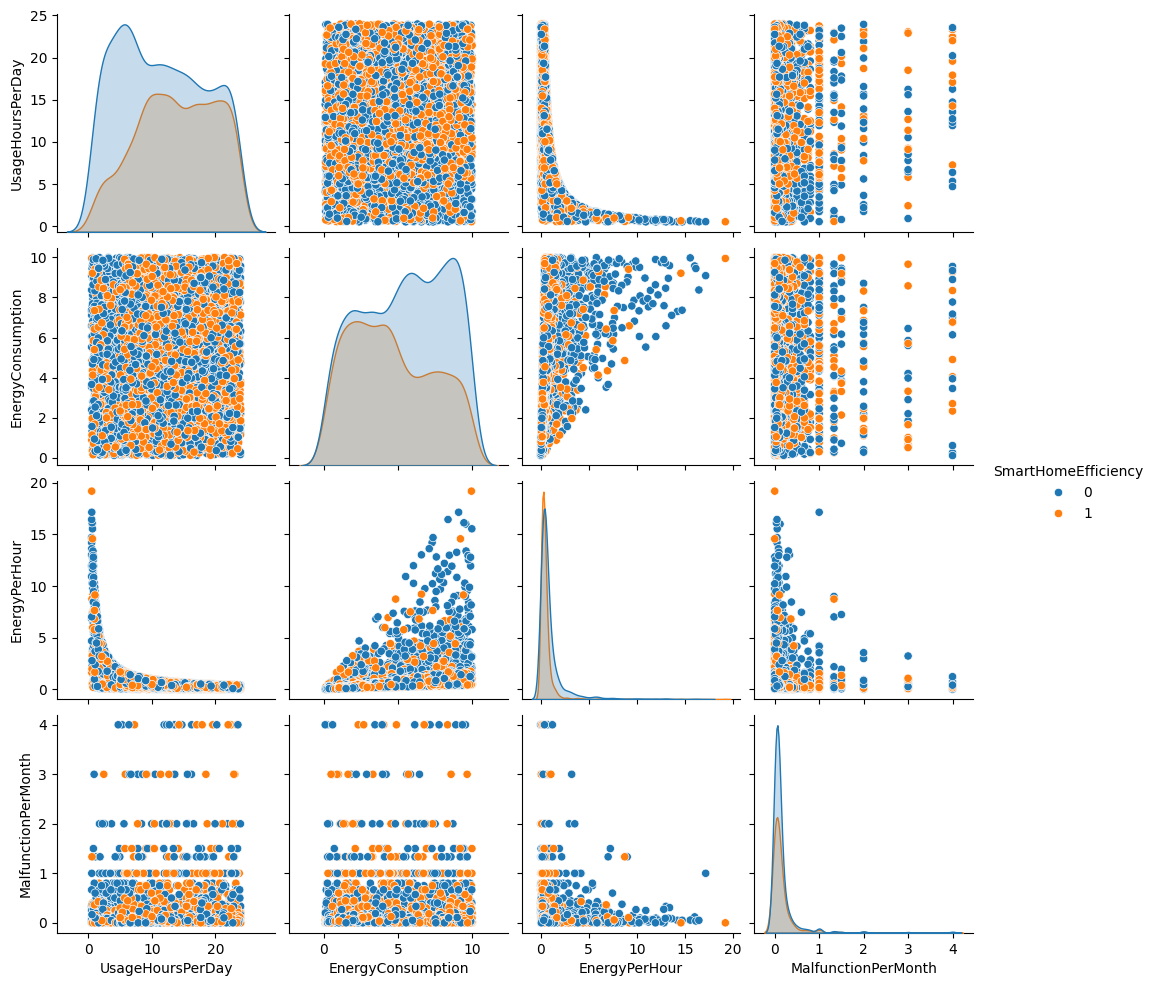

In [31]:
sns.pairplot(
    data,
    hue="SmartHomeEfficiency",
    vars=[
        "UsageHoursPerDay",
        "EnergyConsumption",
        "EnergyPerHour",
        "MalfunctionPerMonth",
    ],
)


plt.show()

        DeviceType  UsageHoursPerDay  EnergyConsumption  UserPreferences  \
0    Smart Speaker         15.307188           1.961607                1   
1           Camera         19.973343           8.610689                1   
2  Security System         18.911535           2.651777                1   
3           Camera          7.011127           2.341653                0   
4           Camera         22.610684           4.859069                1   

   MalfunctionIncidents  DeviceAgeMonths  SmartHomeEfficiency  
0                     4               36                    1  
1                     0               29                    1  
2                     0               20                    1  
3                     3               15                    0  
4                     3               36                    1  


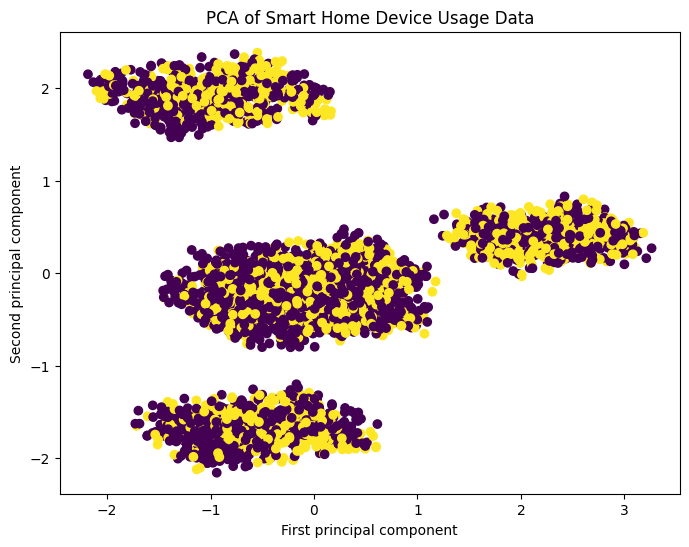

Confusion Matrix
[[1059  102]
 [ 109  651]]

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1161
           1       0.86      0.86      0.86       760

    accuracy                           0.89      1921
   macro avg       0.89      0.88      0.88      1921
weighted avg       0.89      0.89      0.89      1921


Accuracy Score
0.8901613742842269


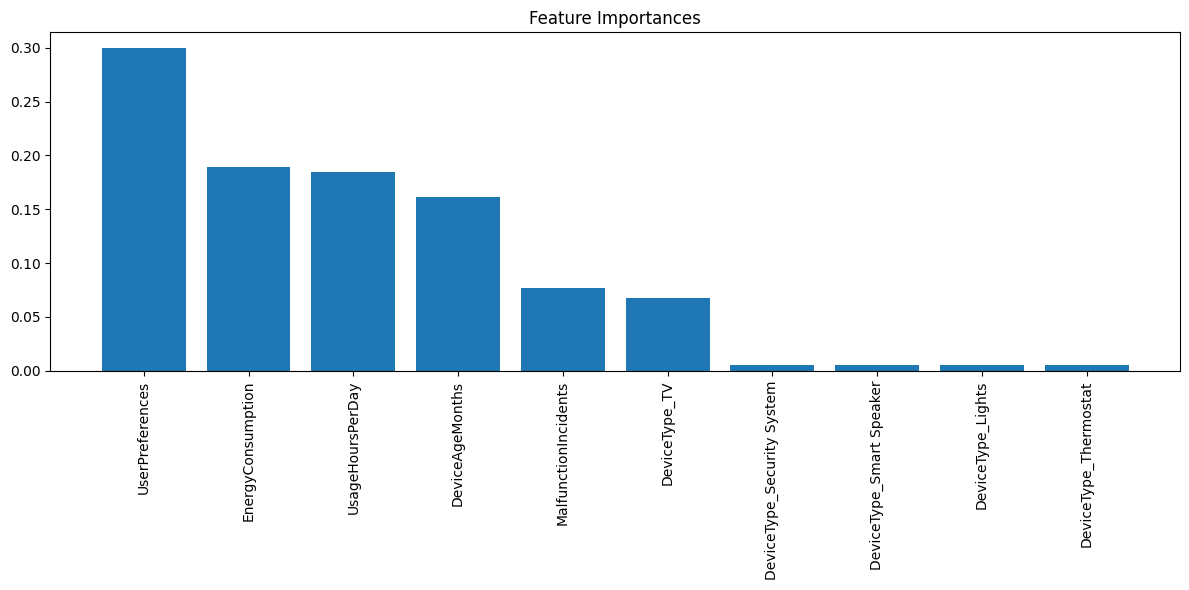

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Confusion Matrix (Optimized Model)
[[1059  102]
 [ 112  648]]

Classification Report (Optimized Model)
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1161
           1       0.86      0.85      0.86       760

    accuracy                           0.89      1921
   macro avg       0.88      0.88      0.88      1921
weighted avg       0.89      0.89      0.89      1921


Accuracy Score (Optimized Model)
0.8885996876626757
Model saved


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
import joblib

data = pd.read_csv("data/tv_add.csv")
print(data.head())

X = data.drop("SmartHomeEfficiency", axis=1)
y = data["SmartHomeEfficiency"]

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap="viridis")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.title("PCA of Smart Home Device Usage Data")
plt.show()

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score")
print(accuracy_score(y_test, y_pred))

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

grid_search = GridSearchCV(
    estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2
)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)
print("Confusion Matrix (Optimized Model)")
print(confusion_matrix(y_test, y_pred_best))
print("\nClassification Report (Optimized Model)")
print(classification_report(y_test, y_pred_best))
print("\nAccuracy Score (Optimized Model)")
print(accuracy_score(y_test, y_pred_best))

joblib.dump(best_model, "model.pkl")
print("Model saved")

        DeviceType  UsageHoursPerDay  EnergyConsumption  UserPreferences  \
0    Smart Speaker         15.307188           1.961607                1   
1           Camera         19.973343           8.610689                1   
2  Security System         18.911535           2.651777                1   
3           Camera          7.011127           2.341653                0   
4           Camera         22.610684           4.859069                1   

   MalfunctionIncidents  DeviceAgeMonths  SmartHomeEfficiency  
0                     4               36                    1  
1                     0               29                    1  
2                     0               20                    1  
3                     3               15                    0  
4                     3               36                    1  
           DeviceType  UsageHoursPerDay  EnergyConsumption  \
0       Smart Speaker         15.307188           1.961607   
1              Camera         19.97

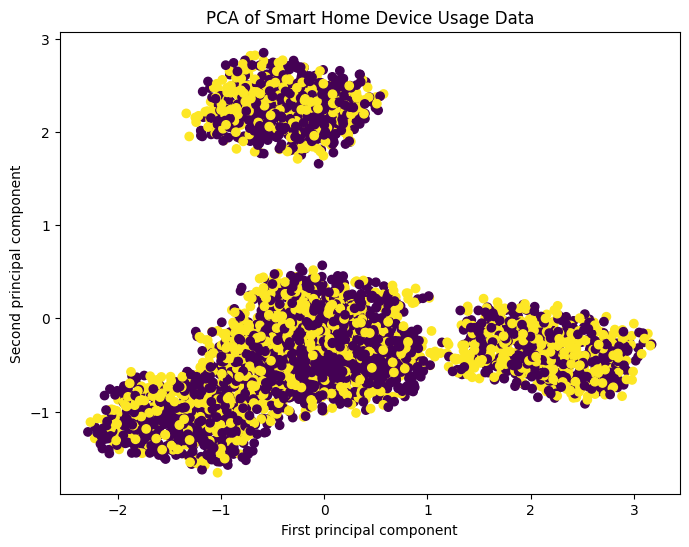

Confusion Matrix
[[809 335]
 [378 399]]

Classification Report
              precision    recall  f1-score   support

           0       0.68      0.71      0.69      1144
           1       0.54      0.51      0.53       777

    accuracy                           0.63      1921
   macro avg       0.61      0.61      0.61      1921
weighted avg       0.63      0.63      0.63      1921


Accuracy Score
0.6288391462779802


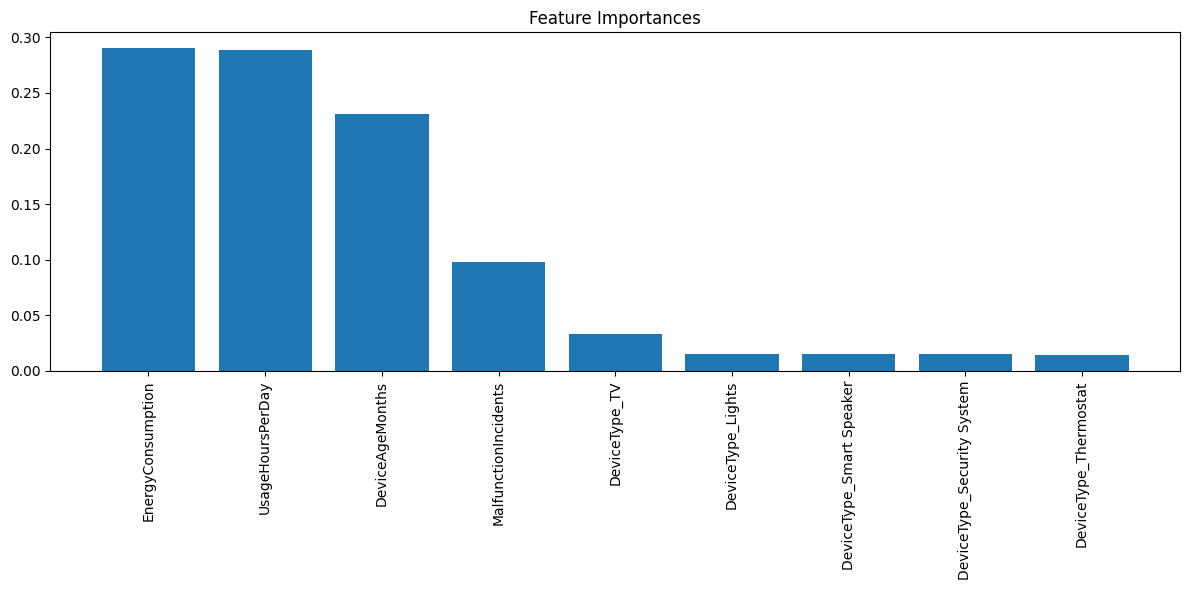

Fitting 3 folds for each of 120 candidates, totalling 360 fits
Confusion Matrix (Optimized Model)
[[790 354]
 [404 373]]

Classification Report (Optimized Model)
              precision    recall  f1-score   support

           0       0.66      0.69      0.68      1144
           1       0.51      0.48      0.50       777

    accuracy                           0.61      1921
   macro avg       0.59      0.59      0.59      1921
weighted avg       0.60      0.61      0.60      1921


Accuracy Score (Optimized Model)
0.6054138469547111
Model saved


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
import joblib

data = pd.read_csv("data/tv_add.csv")
print(data.head())

X = data.drop("SmartHomeEfficiency", axis=1)
X = X.drop("UserPreferences", axis=1)
print(X)
y = data["SmartHomeEfficiency"]

X = pd.get_dummies(X, columns=["DeviceType"], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap="viridis")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.title("PCA of Smart Home Device Usage Data")
plt.show()

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score")
print(accuracy_score(y_test, y_pred))

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()

param_grid = {
    "n_estimators": [50, 100, 150, 200, 300],
    "max_depth": [None, 10, 20, 30, 40, 50],
    "min_samples_split": [2, 5, 10, 15],
}


grid_search = GridSearchCV(
    estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2
)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)
print("Confusion Matrix (Optimized Model)")
print(confusion_matrix(y_test, y_pred_best))
print("\nClassification Report (Optimized Model)")
print(classification_report(y_test, y_pred_best))
print("\nAccuracy Score (Optimized Model)")
print(accuracy_score(y_test, y_pred_best))

joblib.dump(best_model, "model_1.pkl")
print("Model saved")

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
import joblib

data = pd.read_csv("data/tv_add.csv")
print(data.head())

X = data.drop("SmartHomeEfficiency", axis=1)
X = X.drop("UserPreferences", axis=1)
y = data["SmartHomeEfficiency"]
X

        DeviceType  UsageHoursPerDay  EnergyConsumption  UserPreferences  \
0    Smart Speaker         15.307188           1.961607                1   
1           Camera         19.973343           8.610689                1   
2  Security System         18.911535           2.651777                1   
3           Camera          7.011127           2.341653                0   
4           Camera         22.610684           4.859069                1   

   MalfunctionIncidents  DeviceAgeMonths  SmartHomeEfficiency  
0                     4               36                    1  
1                     0               29                    1  
2                     0               20                    1  
3                     3               15                    0  
4                     3               36                    1  


,DeviceType,UsageHoursPerDay,EnergyConsumption,MalfunctionIncidents,DeviceAgeMonths
0,Smart Speaker,15.307188,1.961607,4,36
1,Camera,19.973343,8.610689,0,29
2,Security System,18.911535,2.651777,0,20
3,Camera,7.011127,2.341653,3,15
4,Camera,22.610684,4.859069,3,36
...,...,...,...,...,...
6398,TV,17.364035,9.743600,5,38
6399,TV,12.210936,9.562075,4,15
6400,TV,12.871583,1.208301,4,11
6401,TV,1.017913,9.969607,5,30


In [ ]:
X = pd.get_dummies(X, columns=["DeviceType"], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap="viridis")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.title("PCA of Smart Home Device Usage Data")
plt.show()

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score")
print(accuracy_score(y_test, y_pred))

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()

param_grid = {
    "n_estimators": [50, 100, 150, 200, 300],
    "max_depth": [None, 10, 20, 30, 40, 50],
    "min_samples_split": [2, 5, 10, 15],
}


grid_search = GridSearchCV(
    estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2
)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)
print("Confusion Matrix (Optimized Model)")
print(confusion_matrix(y_test, y_pred_best))
print("\nClassification Report (Optimized Model)")
print(classification_report(y_test, y_pred_best))
print("\nAccuracy Score (Optimized Model)")
print(accuracy_score(y_test, y_pred_best))

joblib.dump(best_model, "model_1.pkl")
print("Model saved")

In [ ]:
import joblib
import pandas as pd

model = joblib.load("model.pkl")


def test_model_on_random_data(input_data):
    input_data = pd.DataFrame([input_data])

    input_data = pd.get_dummies(input_data, columns=["DeviceType"])

    model_columns = [
        "UsageHoursPerDay",
        "EnergyConsumption",
        "MalfunctionIncidents",
        "DeviceAgeMonths",
        "DeviceType_Lights",
        "DeviceType_Security System",
        "DeviceType_Smart Speaker",
        "DeviceType_TV",
        "DeviceType_Thermostat",
    ]

    for col in model_columns:
        if col not in input_data.columns:
            input_data[col] = 0

    prediction = model.predict(input_data[model_columns])
    return prediction


random_data = {
    "DeviceType": "TV",
    "UsageHoursPerDay": 20,
    "EnergyConsumption": 7,
    "MalfunctionIncidents": 4,
    "DeviceAgeMonths": 25,
}

predicted_class = test_model_on_random_data(random_data)
print(f"Predicted SmartHomeEfficiency: {predicted_class[0]}")

Predicted SmartHomeEfficiency: 1


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
